In [3]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings('ignore')




In [6]:
def random_colours(no):
    colors=[]
    for i in range(no):
        colors.append('#'+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [7]:
random_colours(5)

['#706733', '#13C20E', '#6B0828', '#9E4E0C', '#F84005']

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
train.shape,test.shape

((27481, 4), (3534, 3))

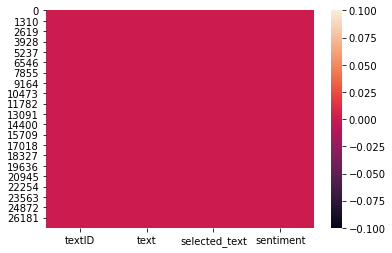

In [17]:
sns.heatmap(train.isnull())

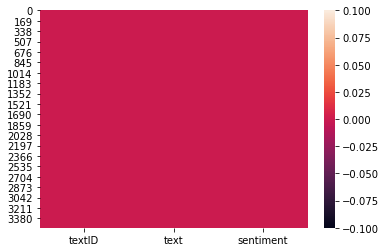

In [18]:
sns.heatmap(test.isnull())

In [19]:
train.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [15]:
test.isnull().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [16]:
train.dropna(inplace=True)

In [20]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [43]:
temp=train.groupby('sentiment').count()['text'].reset_index().sort_values('text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781
